In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
from IPython.display import HTML
import matplotlib.animation as animation

* Параметры среды

In [2]:
k = 1.38e-23
R = 8.31
dt = 0.001

* Параметры первого газа

In [3]:
T_1 = 1000
m0_1 = 6.645e-27
M_1 = 28 * 10 ^ -3
N_1 = 100

* Параметры второго газа

In [4]:
T_2 = 5000
m0_2 = 3 * m0_1
M_2 = 3 * M_1
N_2 = 55

* Параметры сосуда

In [5]:
wdt = 100
hgt = 100

Сгенерируем следующие параметры: 
* Координаты x и y
* Начальные скорости
* Скорости частиц
* Угол полета

In [6]:
veloc_1 = (3 * k * T_1 / (m0_1 * N_1))**0.5
velocs_1 = [[veloc_1, rand.uniform(-np.pi, np.pi)] for i in range(N_1)]
coords_1 = [[rand.uniform(0, wdt / 2), rand.uniform(0, hgt)] for i in range(N_1)]

veloc_2 = (3 * k * T_2 / (m0_2 * N_2))**0.5
velocs_2 = [[veloc_2, rand.uniform(-np.pi, np.pi)] for i in range(N_2)]
coords_2 = [[rand.uniform(wdt / 2, wdt),
            rand.uniform(0, hgt)] for i in range(N_2)]

Проверим частицы на столкновение со стенками

In [7]:
def coolisons(coord, veloc):
    global wdt, hgt
    """
    coord - x, y
    veloc - V, phi
    """
    x = coord[0]
    y = coord[1]
    phi = veloc[1]

    if (x >= wdt):
        phi = np.pi - phi
        x = wdt
    if (x <= 0):
        phi = np.pi - phi
        x = 0

    if (y >= hgt):
        phi = -phi
        y = hgt
    if (y <= 0):
        phi = -phi
        y = 0

    coord[0] = x
    coord[1] = y
    veloc[1] = phi

Изменение координаты у частиц

In [8]:
def moveParticle(coord, veloc):
    """
    coord - x, y
    veloc - V, phi
    """
    x = coord[0]
    y = coord[1]
    v = veloc[0]
    phi = veloc[1]

    x = x + v * np.cos(phi) * dt
    y = y + v * np.sin(phi) * dt

    coord[0] = x
    coord[1] = y

Обновление всех частиц

In [9]:
def update():
    global coords_1, velocs_1, N_1
    global coords_2, velocs_2, N_2

    for i in range(N_1):
        moveParticle(coords_1[i], velocs_1[i])
        coolisons(coords_1[i], velocs_1[i])

    for i in range(N_2):
        moveParticle(coords_2[i], velocs_2[i])
        coolisons(coords_2[i], velocs_2[i])

In [10]:
def axisUpdate():
    """
    перерисовка границ
    """
    global ax, wdt, hgt
    ax.clear()
    ax.set_xlim(0, wdt)
    ax.set_ylim(0, hgt)

In [11]:
def animate(i):
    """
    анимация симуляции
    """
    global ax, coords_1, coords_2
    axisUpdate()
    update()

    for j in range(N_1):
        ax.scatter([coords_1[j][0]], [coords_1[j][1]], color='b')
    for j in range(N_2):
        ax.scatter([coords_2[j][0]], [coords_2[j][1]], color='r')

Отрисовка симуляции

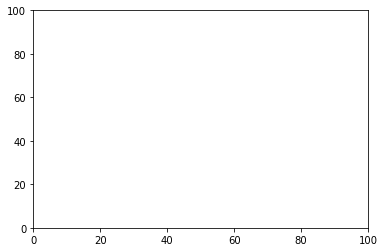

In [12]:
fig = plt.figure()
ax = plt.axes(xlim=(0, wdt), ylim=(0, hgt))

In [13]:
anim = animation.FuncAnimation(fig, animate, frames=500, interval=5)
HTML(anim.to_jshtml())